In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv') # Загружаем наш датасет
df = df.drop('Unnamed: 0', 1) # Избавляемся от лишнего столбца с порядковыми номерами
df.head() # Смотрим на наши данные

C:\Users\7C77~1\AppData\Local\Temp/ipykernel_26024/2209845470.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0', 1) # Избавляемся от лишнего столбца с порядковыми номерами


,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [3]:
df.info() # Проверяем данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

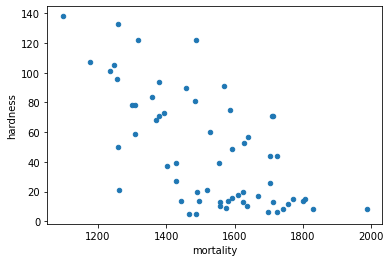

In [4]:
df.plot(kind='scatter', x='mortality', y='hardness') # Строим точечный график

In [5]:
df[['mortality', 'hardness']].corr() # Пирсон, -0,65 говорит о наличие среднесильной обратной связи между показателями

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [6]:
df[['mortality', 'hardness']].corr(method='spearman') # Спирман, -0,63 - делаем аналогичный вывод

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df[['mortality']]
y = df['hardness']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # Делим наш датасет на две выборки

In [10]:
X_train.shape

(42, 1)

In [11]:
y_train.shape

(42,)

In [12]:
model = LinearRegression() # Выбираем модель
model.fit(X_train, y_train)  # Обучаем наш метод
model.coef_

array([-0.12670202])

In [13]:
model.intercept_

239.3678426140957

In [14]:
y_pred = model.predict(X_test)

In [15]:
model.score(X_test, y_test) # Коэффициент детерминации - модель могла бы быть лучше, но видимо мало данных

0.4948982822876836

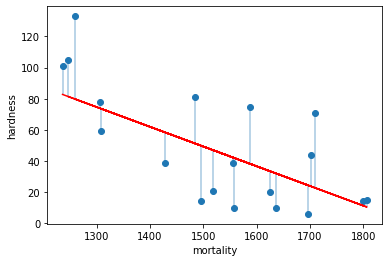

In [16]:
plt.plot(X_test, y_pred, c='r') # Построим график модели
plt.vlines(x=X_test, ymin=y_test, ymax=y_pred, alpha=0.4)
plt.scatter(X_test, y_test, alpha=1)

plt.xlabel('mortality')
plt.ylabel('hardness')

plt.show()

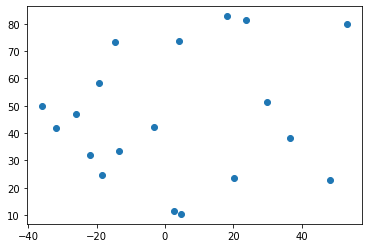

In [17]:
residuals = y_test - y_pred # Расчитываем остатки

plt.scatter(residuals, y_pred) # Строим график остатков

plt.show()

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [18]:
dfS = df.loc[df['location'] == 'South'] # Делим наш датафрейм на два
dfN = df.loc[df['location'] == 'North']

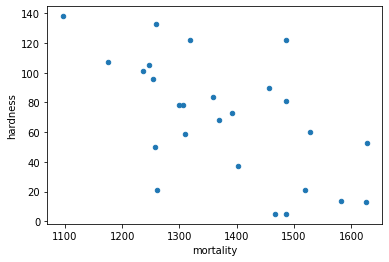

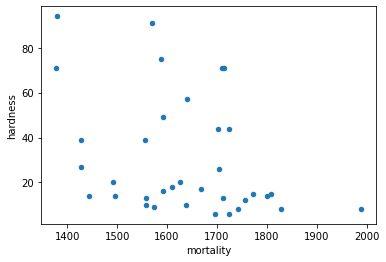

In [19]:
dfS.plot(kind='scatter', x='mortality', y='hardness') # Строим точечные графики
plt.show()
dfN.plot(kind='scatter', x='mortality', y='hardness')
plt.show()

Модель для Южных городов

In [20]:
dfS[['mortality', 'hardness']].corr() # Пирсон, -0,60 говорит о наличие среднесильной обратной связи между показателями

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [21]:
dfS[['mortality', 'hardness']].corr(method='spearman') # Спирман, -0,59 - делаем аналогичный вывод

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [22]:
X = dfS[['mortality']]
y = dfS['hardness']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # Делим наш датасет на две выборки

In [24]:
X_train.shape

(18, 1)

In [25]:
y_train.shape

(18,)

In [26]:
model = LinearRegression() # Выбираем модель
model.fit(X_train, y_train)  # Обучаем наш метод
model.coef_

array([-0.18112812])

In [27]:
model.intercept_

324.1190746235987

In [28]:
y_pred = model.predict(X_test)

In [29]:
model.score(X_test, y_test) # Коэффициент детерминации - модель плохая и скорее всего выбранна неверно

-0.052266157944838465

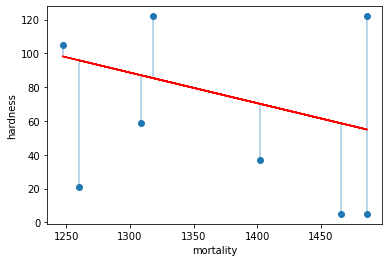

In [30]:
plt.plot(X_test, y_pred, c='r') # Построим график модели
plt.vlines(x=X_test, ymin=y_test, ymax=y_pred, alpha=0.4)
plt.scatter(X_test, y_test, alpha=1)

plt.xlabel('mortality')
plt.ylabel('hardness')

plt.show()

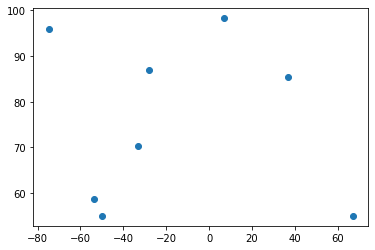

In [31]:
residuals = y_test - y_pred # Расчитываем остатки

plt.scatter(residuals, y_pred) # Строим график остатков

plt.show()

Модель для Северных городов

In [32]:
dfN[['mortality', 'hardness']].corr() # Пирсон, -0,36 говорит о наличие слабой обратной связи между показателями

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [33]:
dfN[['mortality', 'hardness']].corr(method='spearman') # Спирман, -0,40 - немного лучший показатель связи, но все еще слабый

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [34]:
X = dfN[['mortality']]
y = dfN['hardness']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # Делим наш датасет на две выборки

In [36]:
X_train.shape

(24, 1)

In [37]:
y_train.shape

(24,)

In [38]:
model = LinearRegression() # Выбираем модель
model.fit(X_train, y_train)  # Обучаем наш метод
model.coef_

array([-0.09774218])

In [39]:
model.intercept_

191.72797679112006

In [40]:
y_pred = model.predict(X_test)

In [41]:
model.score(X_test, y_test) # Коэффициент детерминации - модель показала себя лучше, чем у Южных городов, но данных все еще мало

-0.34863672627416675

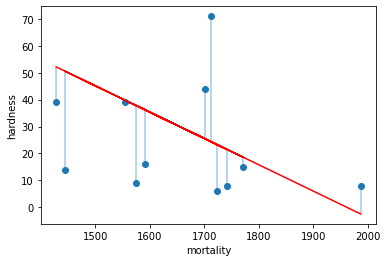

In [42]:
plt.plot(X_test, y_pred, c='r') # построим график остатков
plt.vlines(x=X_test, ymin=y_test, ymax=y_pred, alpha=0.4)
plt.scatter(X_test, y_test, alpha=1)

plt.xlabel('mortality')
plt.ylabel('hardness')

plt.show()

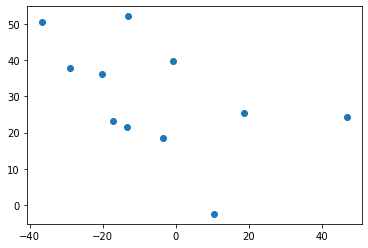

In [43]:
residuals = y_test - y_pred # Расчитываем остатки

plt.scatter(residuals, y_pred) # Строим график остатков

plt.show()